In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# Preprocessing

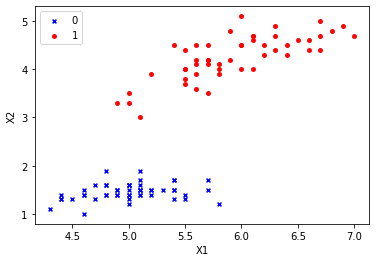

In [2]:
iris = load_iris()
data = iris.data
target = iris.target
# print (data[:10])
# print (target[10:])
X = data[0:100,[0,2]]
y = target[0:100]
# print (X[:5])
# print (y[-5:])
label = np.array(y)
index_0 = np.where(label==0)
plt.scatter(X[index_0,0],X[index_0,1],marker='x',color = 'b',label = '0',s = 15)
index_1 =np.where(label==1)
plt.scatter(X[index_1,0],X[index_1,1],marker='o',color = 'r',label = '1',s = 15)

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper left')
plt.show()

# Training Models(training dataset) 
## 编写逻辑回归模型的类

In [3]:
class logistic(object):
    def __init__(self):
        self.W = None
    def train(self,X,y,learn_rate = 0.01,num_iters = 50000):
        num_train,num_feature = X.shape
        #init the weight
        self.W = 0.001*np.random.randn(num_feature,1).reshape((-1,1))
        loss = []
        
        for i in range(num_iters):
            error,dW = self.compute_loss(X,y)
            self.W += -learn_rate*dW
            
            loss.append(error)
            if i%200==0:
                print('i={:d}, error= {:f}'.format(i,error))
        return loss
    
    def compute_loss(self,X,y):
        num_train = X.shape[0]
        h = self.output(X)
        loss = -np.sum((y*np.log(h) + (1-y)*np.log((1-h))))
        loss = loss / num_train
        
        dW = X.T.dot((h-y)) / num_train
    
        return loss,dW
    
    def output(self,X):
        g = np.dot(X,self.W)
        return self.sigmod(g)
    def sigmod(self,X):
        return 1/(1+np.exp(-X))
    
    def predict(self,X_test):
        h = self.output(X_test)
        y_predl = np.where(h>=0.5,1,0)
        return y_predl

## 训练测试一下，并且可视化跟踪的损失loss

i=0, error= 0.691884
i=200, error= 0.364614
i=400, error= 0.238239
i=600, error= 0.174837
i=800, error= 0.137701
i=1000, error= 0.113561
i=1200, error= 0.096691
i=1400, error= 0.084265
i=1600, error= 0.074741
i=1800, error= 0.067213
i=2000, error= 0.061114
i=2200, error= 0.056072
i=2400, error= 0.051834
i=2600, error= 0.048221
i=2800, error= 0.045104
i=3000, error= 0.042387
i=3200, error= 0.039997
i=3400, error= 0.037877
i=3600, error= 0.035984
i=3800, error= 0.034283
i=4000, error= 0.032746
i=4200, error= 0.031350
i=4400, error= 0.030076
i=4600, error= 0.028909
i=4800, error= 0.027835
i=5000, error= 0.026844
i=5200, error= 0.025926
i=5400, error= 0.025074
i=5600, error= 0.024280
i=5800, error= 0.023538
i=6000, error= 0.022844
i=6200, error= 0.022193
i=6400, error= 0.021581
i=6600, error= 0.021004
i=6800, error= 0.020460
i=7000, error= 0.019946
i=7200, error= 0.019458
i=7400, error= 0.018996
i=7600, error= 0.018558
i=7800, error= 0.018140
i=8000, error= 0.017743
i=8200, error= 0.017364

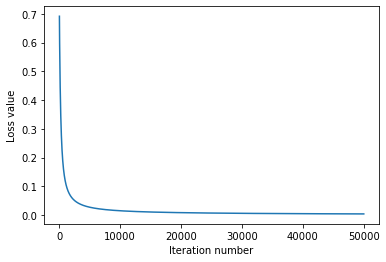

In [5]:
# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

y = y.reshape((-1,1))
#add the x0=1
one = np.ones((x_train.shape[0],1))
X_train = np.hstack((one,x_train))

one_test = np.ones((x_test.shape[0],1))
X_test = np.hstack((one_test,x_test))

classify = logistic()
loss = classify.train(X_train,y_train)
# print (classify.W)

plt.plot(loss)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')

plt.show()

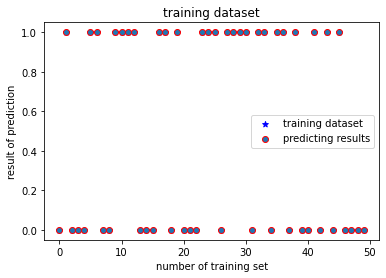

In [7]:
#TODO: delete tthis

fig, ax=plt.subplots()
# ax.scatter(y_train,classify.predict(X_train))
# ax.plot([0,10], [0,10], "r--", label="perfect prediction")
xx = range(0,50,1)
ax.scatter(xx, y_train.transpose(), marker='*', color = 'b', label = "training dataset")
ax.scatter(xx, classify.predict(X_train).transpose(), marker='o',edgecolors = 'r', label = "predicting results")
plt.legend()
ax.set(xlabel="number of training set", ylabel="result of prediction",title="training dataset")
plt.show()


# label = np.array(y)
# index_0 = np.where(label==0)
# plt.scatter(X[index_0,0],X[index_0,1],marker='x',color = 'b',label = '0',s = 15)
# index_1 =np.where(label==1)
# plt.scatter(X[index_1,0],X[index_1,1],marker='o',color = 'r',label = '1',s = 15)

## 最后可视化“决策边界”

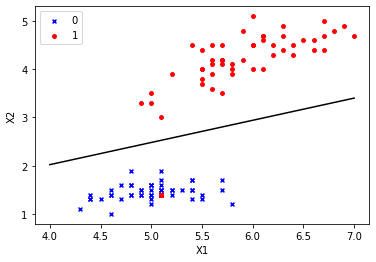

In [8]:
label = np.array(y)
index_0 = np.where(label==0)
plt.scatter(X[index_0,0],X[index_0,1],marker='x',color = 'b',label = '0',s = 15)
index_1 =np.where(label==1)
plt.scatter(X[index_1,0],X[index_1,1],marker='o',color = 'r',label = '1',s = 15)

#show the decision boundary
x1 = np.arange(4,7.5,0.5)
x2 = (- classify.W[0] - classify.W[1]*x1) / classify.W[2]
plt.plot(x1,x2,color = 'black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
# fig, ax=plt.subplots()
# ax.scatter(x1,x2)
# ax.plot([0,10], [0,10], "r--", label="perfect prediction")
# plt.legend()
# ax.set(xlabel="y_train", ylabel="y_hat",title="training dataset")
# plt.show()

# Using Models(testing dataset)

<ipython-input-9-9d725b47b5a9>:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.scatter(xx_test, classify.predict(X_test).transpose(), marker='o', edgecolors = 'g', color = '', label = "predicting results")


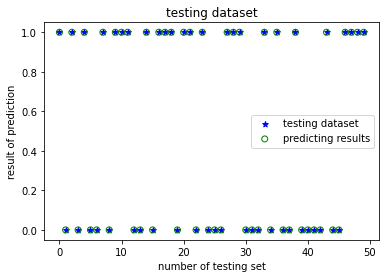

In [9]:
# TODO: replace this figure by that from linear regression (y_hat vs y_true)

fig, ax=plt.subplots()
# ax.scatter(y_train,classify.predict(X_train))
# ax.plot([0,10], [0,10], "r--", label="perfect prediction")
xx_test = range(0,50,1)
ax.scatter(xx_test, y_test.transpose(), marker='*', color = 'b', label = "testing dataset")
ax.scatter(xx_test, classify.predict(X_test).transpose(), marker='o', edgecolors = 'g', color = '', label = "predicting results")
plt.legend()
ax.set(xlabel="number of testing set", ylabel="result of prediction",title="testing dataset")
plt.show()